In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pll
import lightgbm as lgb
import sklearn as sklearn
import os
import seaborn as sns
import tensorflow as tf
import keras as keras
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)
from plotly.subplots import make_subplots
from numpy import reshape
from matplotlib.patches import Patch




In [56]:
# Load Train Data
TrainData = pd.read_csv("FullTrainData.csv", sep=';')
TrainData

,Fluid_level_tank102,Pressure_tank103,Pump_speed,Flowmeter,Fluid_lvl_tank101_IO_link,Fluid_lvl_tank102_IO_link,V101,V102,V103,V104,...,State,Liquid_growth_B102,Pipe_clogging_factor,Flow_diff,Pressure_diff,Pressure_flow_ratio,Pressure_pumpspeed_ratio,Tanks_level_diff,Fluid_level_dependancy,Failure
0,79.25,154.83,71.46,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-4.83,0.00,11064.80,25.75,0.0,0
1,79.09,155.59,71.08,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-5.59,0.00,11059.69,25.91,0.0,0
2,79.25,149.47,70.71,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,0.53,0.00,10569.08,25.75,0.0,0
3,79.25,147.43,70.40,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,2.57,0.00,10378.78,25.75,0.0,0
4,79.09,150.24,70.36,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-0.24,0.00,10571.38,25.91,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51367,80.94,5.61,0.00,-0.36,85,85,1,1,0,0,...,9,-0.18,0.0,0.36,-5.61,-2.02,0.00,4.06,-0.0,0
51368,80.43,5.61,0.00,-0.36,85,85,1,1,0,0,...,9,-0.18,0.0,0.36,-5.61,-2.02,0.00,4.57,-0.0,0
51369,80.26,5.61,0.00,-0.36,85,85,1,1,0,0,...,9,-0.18,0.0,0.36,-5.61,-2.02,0.00,4.74,-0.0,0
51370,80.10,5.61,0.00,-0.37,85,85,1,1,0,0,...,9,-0.19,0.0,0.37,-5.61,-2.08,0.00,4.90,-0.0,0


In [57]:
# Load Validate Data
ValidateData = pd.read_csv("ValidateData.csv", sep=';')
ValidateData

,Fluid_level_tank102,Pressure_tank103,Pump_speed,Flowmeter,Fluid_lvl_tank101_IO_link,Fluid_lvl_tank102_IO_link,V101,V102,V103,V104,...,State,Liquid_growth_B102,Pipe_clogging_factor,Flow_diff,Pressure_diff,Pressure_flow_ratio,Pressure_pumpspeed_ratio,Tanks_level_diff,Fluid_level_dependancy,Failure
0,79.42,197.94,77.61,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-47.94,0.00,15361.37,25.58,0.0,0
1,79.42,174.21,73.57,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-24.21,0.00,12816.25,25.58,0.0,0
2,79.42,159.93,71.73,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-9.93,0.00,11471.88,25.58,0.0,0
3,79.42,154.83,71.00,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-4.83,0.00,10992.74,25.58,0.0,0
4,79.42,156.36,70.28,0.00,105,80,0,0,1,0,...,2,0.00,0.0,0.00,-6.36,0.00,10988.37,25.58,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,81.61,7.14,0.00,-0.35,100,85,1,1,0,0,...,9,-0.18,0.0,0.35,-7.14,-2.50,0.00,18.39,0.0,0
3604,81.27,7.14,0.00,-0.34,105,85,1,1,0,0,...,9,-0.17,0.0,0.34,-7.14,-2.43,0.00,23.73,0.0,0
3605,80.94,6.89,0.00,-0.35,105,85,1,1,0,0,...,9,-0.18,0.0,0.35,-6.89,-2.41,0.00,24.06,0.0,0
3606,80.60,7.14,0.00,-0.35,105,85,1,1,0,0,...,9,-0.18,0.0,0.35,-7.14,-2.50,0.00,24.40,0.0,0


In [58]:
TestingData = pd.read_csv("MergedValData.csv", sep=';')

In [59]:
# Function for extracting features and target to train network

def get_X_Y(trainData):

    
    Features = ['Fluid_level_tank102', 'Pressure_tank103', 'Pump_speed', 'Flowmeter',
        'Fluid_lvl_tank101_IO_link', 'Fluid_lvl_tank102_IO_link', 'V101',
        'V102', 'V103', 'V104', 'V106', 'V107', 'V108', 'V109', 'V112',
        'cycle_counter', 'State', 'Liquid_growth_B102', 'Pipe_clogging_factor',
        'Flow_diff', 'Pressure_diff', 'Pressure_flow_ratio',
        'Pressure_pumpspeed_ratio', 'Tanks_level_diff',
        'Fluid_level_dependancy']

    Target = ['Failure']

    X = trainData[Features]
    Y = trainData[Target]

    return X, Y

In [60]:
# Function for extracting features and target to Validate network

def get_X_Y_Validate(ValidateData):

    
    Features = ['Fluid_level_tank102', 'Pressure_tank103', 'Pump_speed', 'Flowmeter',
        'Fluid_lvl_tank101_IO_link', 'Fluid_lvl_tank102_IO_link', 'V101',
        'V102', 'V103', 'V104', 'V106', 'V107', 'V108', 'V109', 'V112',
        'cycle_counter', 'State', 'Liquid_growth_B102', 'Pipe_clogging_factor',
        'Flow_diff', 'Pressure_diff', 'Pressure_flow_ratio',
        'Pressure_pumpspeed_ratio', 'Tanks_level_diff',
        'Fluid_level_dependancy']

    Target = ['Failure']
 

    X_Validate = ValidateData[Features]
    Y_Validate = ValidateData[Target]

    return X_Validate, Y_Validate

In [61]:
#Creating and training classification model network based on ready algorithm from lightgbm (Cross Validation method)

# Small dataset/can be inbalanced -> Stratified

sgk = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

X, Y = get_X_Y(TrainData)

params = {
          "objective" : "multiclass",
          "num_class" : 5,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 
          }

fold = 0

for train_idx, val_idx in sgk.split(X, Y):
    X_tr = X.loc[train_idx]
    Y_tr = Y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    Y_val = Y.loc[val_idx]

    # Fit Train Model
    lgtrain, lgval = lgb.Dataset(X_tr, Y_tr), lgb.Dataset(X_val, Y_val)
    clf = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)

    
    #predictions
    pred = clf.predict(X_val).argmax(axis=1)

    acc_score = accuracy_score(Y_val, pred)


    print(f"======= Fold {fold} ========")

    print(f"Our accuracy on the validation set is {acc_score:0.4f}")
    fold += 1
    




Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.072966	valid_1's multi_logloss: 0.07914
[400]	training's multi_logloss: 0.0361874	valid_1's multi_logloss: 0.0478712
[600]	training's multi_logloss: 0.0283309	valid_1's multi_logloss: 0.0460774
Early stopping, best iteration is:
[606]	training's multi_logloss: 0.0281544	valid_1's multi_logloss: 0.0460572
======= Fold 0 ========
Our accuracy on the validation set is 0.9817
Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.0712463	valid_1's multi_logloss: 0.0844749
[400]	training's multi_logloss: 0.0347706	valid_1's multi_logloss: 0.05329
[600]	training's multi_logloss: 0.0269946	valid_1's multi_logloss: 0.0510257
Early stopping, best iteration is:
[609]	training's multi_logloss: 0.026745	valid_1's multi_logloss: 0.0509638
======= Fold 1 ========
Our accuracy on the validation set is 0.9781
Training until validation scores don't improve for 100 rou

In [62]:
# Checking algorithm performance by creating confusion matrix for validation data

X_Validate, Y_Validate = get_X_Y_Validate(TestingData)

Y_pred_val = clf.predict(X_Validate).argmax(axis=1)
Y_pred_train = clf.predict(X).argmax(axis=1)
#pred_prob2 = clf.predict_proba(X_Validate)

cm = confusion_matrix(Y_Validate, Y_pred_val)
cm_train = confusion_matrix(Y, Y_pred_train)
#cm

In [63]:
# calculating accuarcy for validation set of each class
cm0=cm[0,0] + cm[0,1]+ cm[0,2]+ cm[0,3]+ cm[0,4]
cm00 = cm[0,0]/cm0
cm1 = cm[1,0] + cm[1,1]+ cm[1,2]+ cm[1,3]+ cm[1,4]
cm11 = cm[1,1]/cm1
cm2 = cm[2,0] + cm[2,1]+ cm[2,2]+ cm[2,3]+ cm[2,4]
cm22 = cm[2,2]/cm2
cm3 = cm[3,0] + cm[3,1]+ cm[3,2]+ cm[3,3]+ cm[3,4]
cm33 = cm[3,3]/cm3
cm4 = cm[4,0] + cm[4,1]+ cm[4,2]+ cm[4,3]+ cm[4,4]
cm44 = cm[4,4]/cm4

# calculating accuarcy for training set of each class
cm0t=cm_train[0,0] + cm_train[0,1]+ cm_train[0,2]+ cm_train[0,3]+ cm_train[0,4]
cm00t = cm_train[0,0]/cm0t
cm1t = cm_train[1,0] + cm_train[1,1]+ cm_train[1,2]+ cm_train[1,3]+ cm_train[1,4]
cm11t = cm_train[1,1]/cm1t
cm2t = cm_train[2,0] + cm_train[2,1]+ cm_train[2,2]+ cm_train[2,3]+ cm_train[2,4]
cm22t = cm_train[2,2]/cm2t
cm3t = cm_train[3,0] + cm_train[3,1]+ cm_train[3,2]+ cm_train[3,3]+ cm_train[3,4]
cm33t = cm_train[3,3]/cm3t
cm4t = cm_train[4,0] + cm_train[4,1]+ cm_train[4,2]+ cm_train[4,3]+ cm_train[4,4]
cm44t = cm_train[4,4]/cm4t


In [64]:
print('Confusion Matrix for Validation set:')
print('')
print('Class 0 Acc, Fully Operational')
print(cm00)
print('Class 1 Acc, Coat')
print(cm11)
print('Class 2 Acc, Leak')
print(cm22)
print('Class 3 Acc, Cyber-atack')
print(cm33)
print('Class 4 Acc, Pipe Clogging')
print(cm44)



Confusion Matrix for Validation set:

Class 0 Acc, Fully Operational
0.996266767906859
Class 1 Acc, Coat
0.9997186268992684
Class 2 Acc, Leak
0.8876849894291755
Class 3 Acc, Cyber-atack
0.9893730074388948
Class 4 Acc, Pipe Clogging
0.9954022988505747


In [65]:
print('Confusion Matrix for Training set:')
print('')
print('Class 0 Acc, Fully Operational')
print(cm00)
print('Class 1 Acc, Coat')
print(cm11)
print('Class 2 Acc, Leak')
print(cm22)
print('Class 3 Acc, Cyber-atack')
print(cm33)
print('Class 4 Acc, Pipe Clogging')
print(cm44)

Confusion Matrix for Training set:

Class 0 Acc, Fully Operational
0.996266767906859
Class 1 Acc, Coat
0.9997186268992684
Class 2 Acc, Leak
0.8876849894291755
Class 3 Acc, Cyber-atack
0.9893730074388948
Class 4 Acc, Pipe Clogging
0.9954022988505747


Confusion matric for validate data


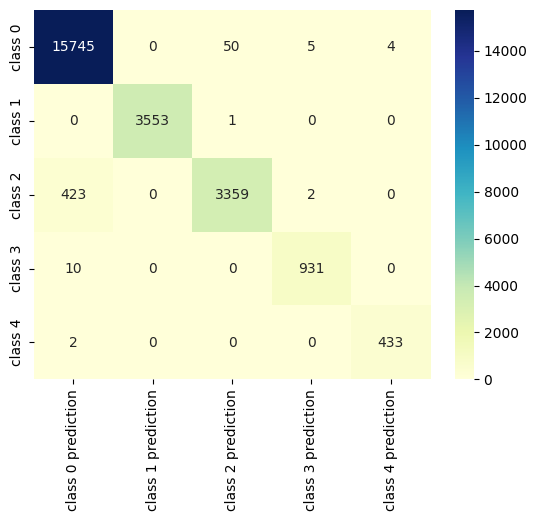

In [66]:
cm_matrix = pd.DataFrame(data=cm, columns=['class 0 prediction', 'class 1 prediction', 'class 2 prediction', 'class 3 prediction','class 4 prediction'],
                                    index=['class 0','class 1','class 2','class 3','class 4'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print('Confusion matric for validate data')

Confusion matric for train data


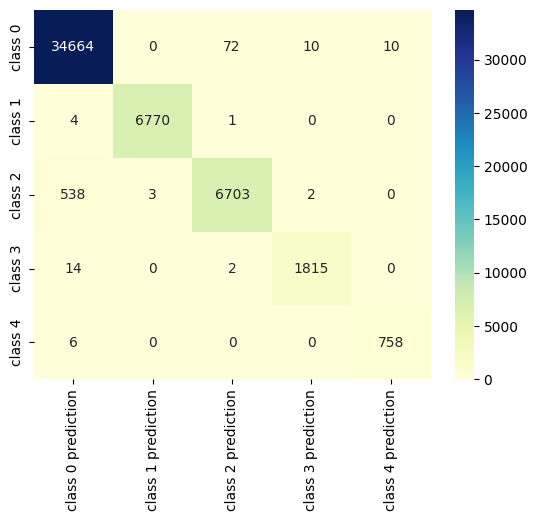

In [67]:
cm_matrix2 = pd.DataFrame(data=cm_train, columns=['class 0 prediction', 'class 1 prediction', 'class 2 prediction', 'class 3 prediction','class 4 prediction'],
                                    index=['class 0','class 1','class 2','class 3','class 4'])

sns.heatmap(cm_matrix2, annot=True, fmt='d', cmap='YlGnBu')
print('Confusion matric for train data')

In [68]:
#checking classification report
print(classification_report(Y_Validate, Y_pred_val))
print('classification report for validate data')

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     15804
           1       1.00      1.00      1.00      3554
           2       0.99      0.89      0.93      3784
           3       0.99      0.99      0.99       941
           4       0.99      1.00      0.99       435

    accuracy                           0.98     24518
   macro avg       0.99      0.97      0.98     24518
weighted avg       0.98      0.98      0.98     24518

classification report for validate data


In [69]:
#checking classification report
print(classification_report(Y, Y_pred_train))
print('classification report for train data')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34756
           1       1.00      1.00      1.00      6775
           2       0.99      0.93      0.96      7246
           3       0.99      0.99      0.99      1831
           4       0.99      0.99      0.99       764

    accuracy                           0.99     51372
   macro avg       0.99      0.98      0.99     51372
weighted avg       0.99      0.99      0.99     51372

classification report for train data


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

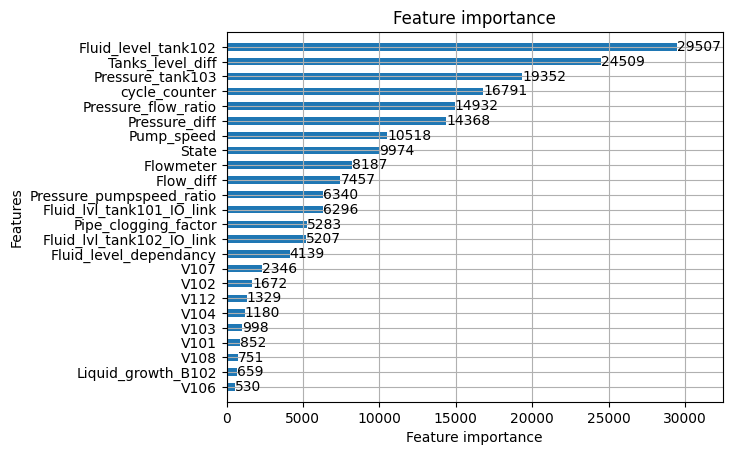

In [70]:
#checking wchich parameters have the most influence on nethwork training
lgb.plot_importance(clf, height=.5)

In [71]:
#saving model
clf.save_model('clf_model.txt')


In [72]:
clf_model = lgb.Booster(model_file='clf_model.txt')

In [73]:
X_Validate, Y_Validate = get_X_Y_Validate(ValidateData)

pred2 = clf.predict(X_Validate)
#pred_prob2 = clf.predict_proba(X_Validate)


pred2



array([[9.99978837e-01, 8.28602474e-06, 8.91478296e-06, 2.89060730e-06,
        1.07208053e-06],
       [9.99978817e-01, 8.28602458e-06, 8.91478278e-06, 2.92036422e-06,
        1.06201558e-06],
       [9.99978924e-01, 8.28602547e-06, 8.91478374e-06, 2.62863927e-06,
        1.24643675e-06],
       ...,
       [9.90819133e-01, 1.80832064e-04, 8.92411653e-03, 5.37577111e-05,
        2.21604400e-05],
       [9.96944773e-01, 1.27958889e-04, 2.86589384e-03, 4.58912648e-05,
        1.54825749e-05],
       [9.97029917e-01, 1.22571498e-04, 2.79211416e-03, 4.05669808e-05,
        1.48305088e-05]])

In [74]:
X_Validate, Y_Validate = get_X_Y_Validate(ValidateData)

pred3 = clf_model.predict(X_Validate)
#pred_prob2 = bst.predict_proba(X_Validate)

#df=pd.DataFrame(pred2)
#df.to_csv('predictions.csv')

pred3

array([[9.99978837e-01, 8.28602474e-06, 8.91478296e-06, 2.89060730e-06,
        1.07208053e-06],
       [9.99978817e-01, 8.28602458e-06, 8.91478278e-06, 2.92036422e-06,
        1.06201558e-06],
       [9.99978924e-01, 8.28602547e-06, 8.91478374e-06, 2.62863927e-06,
        1.24643675e-06],
       ...,
       [9.90819133e-01, 1.80832064e-04, 8.92411653e-03, 5.37577111e-05,
        2.21604400e-05],
       [9.96944773e-01, 1.27958889e-04, 2.86589384e-03, 4.58912648e-05,
        1.54825749e-05],
       [9.97029917e-01, 1.22571498e-04, 2.79211416e-03, 4.05669808e-05,
        1.48305088e-05]])

In [75]:
for i in range(0, X_Validate.shape[0]):
    if pred3[i,0]>=.5:
        pred3[i,0]=1
    else:
        pred3[i,0]=0

    if pred3[i,1]>=.5:
        pred3[i,1]=1
    else:
        pred3[i,1]=0

    if pred3[i,2]>=.5:
        pred3[i,2]=1
    else:
        pred3[i,2]=0

    if pred3[i,3]>=.5:
        pred3[i,3]=1
    else:
        pred3[i,3]=0

    if pred3[i,4]>=.5:
        pred3[i,4]=1
    else:
        pred3[i,4]=0    
pred3

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])